## 房价预测（回归问题）

- 数据探测与可视化：Exploratory Data Analysis (EDA) with Visualization
- 特征提取：Feature Extraction
- 数据模型：Data Modelling
- 模型评价：Model Evaluation

### 导入相应的库/模块

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from scipy import stats

### 加载训练数据集和测试数据集

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

### 数据信息

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

从上面可以看出，train数据集有81列，最后一列是目标值SalePrice，而在test数据集中不存在SalePrice这一列，我们要做的就是预测test数据集的SalePrice列

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Description of all the features and their values
desc_file = open('./data/data_description.txt')
print (desc_file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [9]:
train.get_ftype_counts()

E:\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_ftype_counts is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


float64:dense     3
int64:dense      35
object:dense     43
dtype: int64

In [10]:
train.describe()  #对数值型的数据特征进行统计

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train.info()  #所有的训练数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 看下各列特征与目标变量之间的相关性（Correlation ）

Most features (OverallQual, GrLivArea, GarageCars, etc.) have positive correlation with our target variable SalesPrice but some features (BsmtFinSF2, BsmtHalfBath, YrSold, etc.) have negative correlation as well.

In [12]:
corr = train.corr()['SalePrice']

In [13]:
corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [14]:
corr[np.argsort(corr,axis=0)]  #argsort()函数是将x中的元素从小到大排列

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [15]:
"""
>>> a = [1,8,34,4,6,32,7]
>>> a[-1]
7
>>> a[:-1]
[1, 8, 34, 4, 6, 32]
>>> a[::-1]
[7, 32, 6, 4, 34, 8, 1]
"""
corr[np.argsort(corr,axis=0)[::-1]]   #切片[::-1]是将列表或字符倒过来


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### 绘制线性相关的条形图

Text(0.5,1,'Correlation coefficient w.r.t Sale Price')

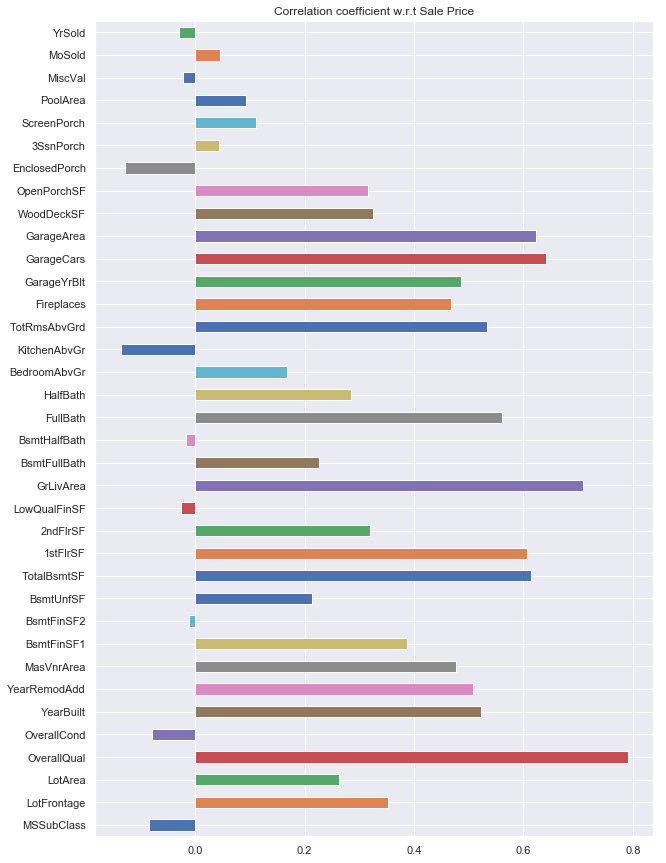

In [16]:
plt.figure(figsize = (10,15))
corr = corr[1:-1]  # 取去掉第一行(Id)和最后一行(SalePrice)的数据
corr.plot(kind='barh')
plt.title('Correlation coefficient w.r.t Sale Price')

In [17]:
corr

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

### Heatmap of highly correlated features with respect to SalePrice  
跟SalePrice有关的高相关性特征的热力图

Text(0.5,1,'Correlation between features')

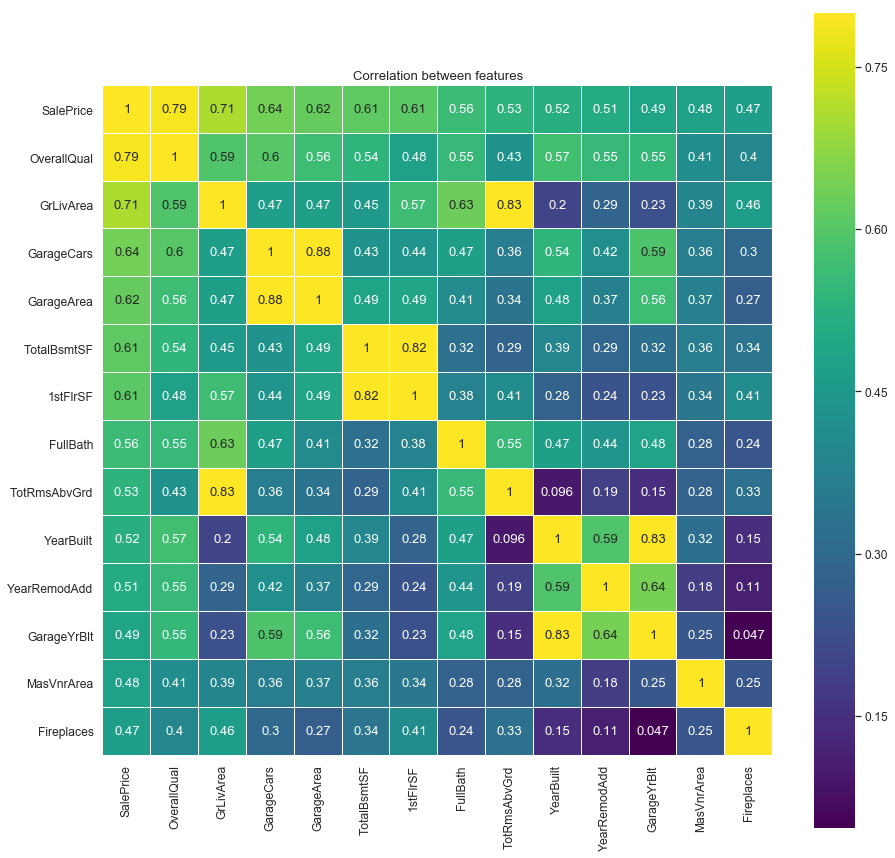

In [18]:
# taking high correlated variables having positive correlation of 45% and above
#取正相关相关性45%及其以上的特征(变量)
high_positive_correlated_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', \
                                      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', \
                                      'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']

corrMatrix = train[high_positive_correlated_variables].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15,15))

sns.heatmap(corrMatrix,vmax=0.8, linewidths=0.01, square=True, annot=True,cmap='viridis', linecolor='white')
plt.title('Correlation between features')


### MultiCollinearity（多重共线性）

From the above heatmap, we can see that some features (other than our target variable SalePrice除了目标变量SalePrice之外) are highly correlated among themselves. Note the yellow blocks（黄色块） in the above heatmap. The following features are intercorrelated:  
> TotRmsAbvGrd <> GrLivArea = 0.83  

> GarageYrBlt <> YearBuilt = 0.83 

> 1stFlrSF <> TotalBsmtSF = 0.82  

> GarageArea <> GarageCars = 0.88

**OverallQual** is the other feature which is highly correlated with our target variable SalePrice.
>SalePrice <> OverallQual = 0.79    

This type of scenario（场景） results in **multicollinearity（多重共线性）**. Multicollinearity occurs when there is moderate or high intercorrelation between independent variables. This can result in high standard error. ——当自变量之间存在适度或高相关性时，就会出现多重共线性。这会导致高的标准误差（均方根误差RMSE）。

【概念】设n个测量值的误差为E1,E2,...,En,则这组测量值的标准误差（standard error）σ等于：  
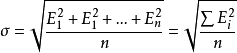  
其中E为误差= 测定值 — 真实值

There are different ways to **reduce multicollinearity（减小多重共线性）**like:
- removing the interrelated features（删除相关的特性）
- creating a new feature by combining the interrelated features.（通过组合相关特性来创建新特性）

Let's see **these features** relation to **SalePrice** in overall data（总体数据）:

In [19]:
feature_variable = 'OverallQual'
target_variable = 'SalePrice'
train[[feature_variable, target_variable]].groupby([feature_variable], as_index=False).mean().sort_values(by=feature_variable, ascending=False)
#直接这样也行：train[['OverallQual','SalePrice']].groupby('OverallQual', as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [20]:
feature_variable = 'GarageCars'
target_variable = 'SalePrice'
train[[feature_variable, target_variable]].groupby([feature_variable], as_index=False).mean().sort_values(by=feature_variable, ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


Multicollinearity among independent variables as stated above are:  
(上述自变量之间的多重共线性为：)

>TotRmsAbvGrd <> GrLivArea = 0.83

>GarageYrBlt <> YearBuilt = 0.83

>1stFlrSF <> TotalBsmtSF = 0.82

>GarageArea <> GarageCars = 0.88

Let's draw a **scatter plot** between **SalePrice** and some of the **high correlated variables** having positive correlation with respect to SalePrice. We take the following independent variables:  
(让我们画一个SalePrice和一些与SalePrice正相关的高相关变量之间的散点图。我们取以下自变量:)

- **OverallQual**
- TotRmsAbvGrd and GrLivArea are correlated as stated above with 83%. Hence, we only take **GrLivArea** because it has higher correlation with SalePrice as compared to TotalRmsAbvGrid.  
(TotRmsAbvGrd与GrLivArea的相关性为83%。因此，我们只取**GrLivArea**，因为与TotalRmsAbvGrid相比，它与SalePrice的相关性更高。)


- GarageArea and GarageCars are correlated as stated above with 88%. Hence, we only take **GarageCars** because it has a bit higher correlation with SalePrice as compared to GarageArea.


- 1stFlrSF and TotalBsmtSF are correlated with 82%. We keep **TotalBsmtSF** because it has a bit higher correlation with SalePrice as compared to 1stFlrSF.


- GarageYrBlt and YearBuilt are correlated as stated above with 83%. We keep **YearBuilt** because it has higher correlation with SalePrice as compared to GarageYrBlt.

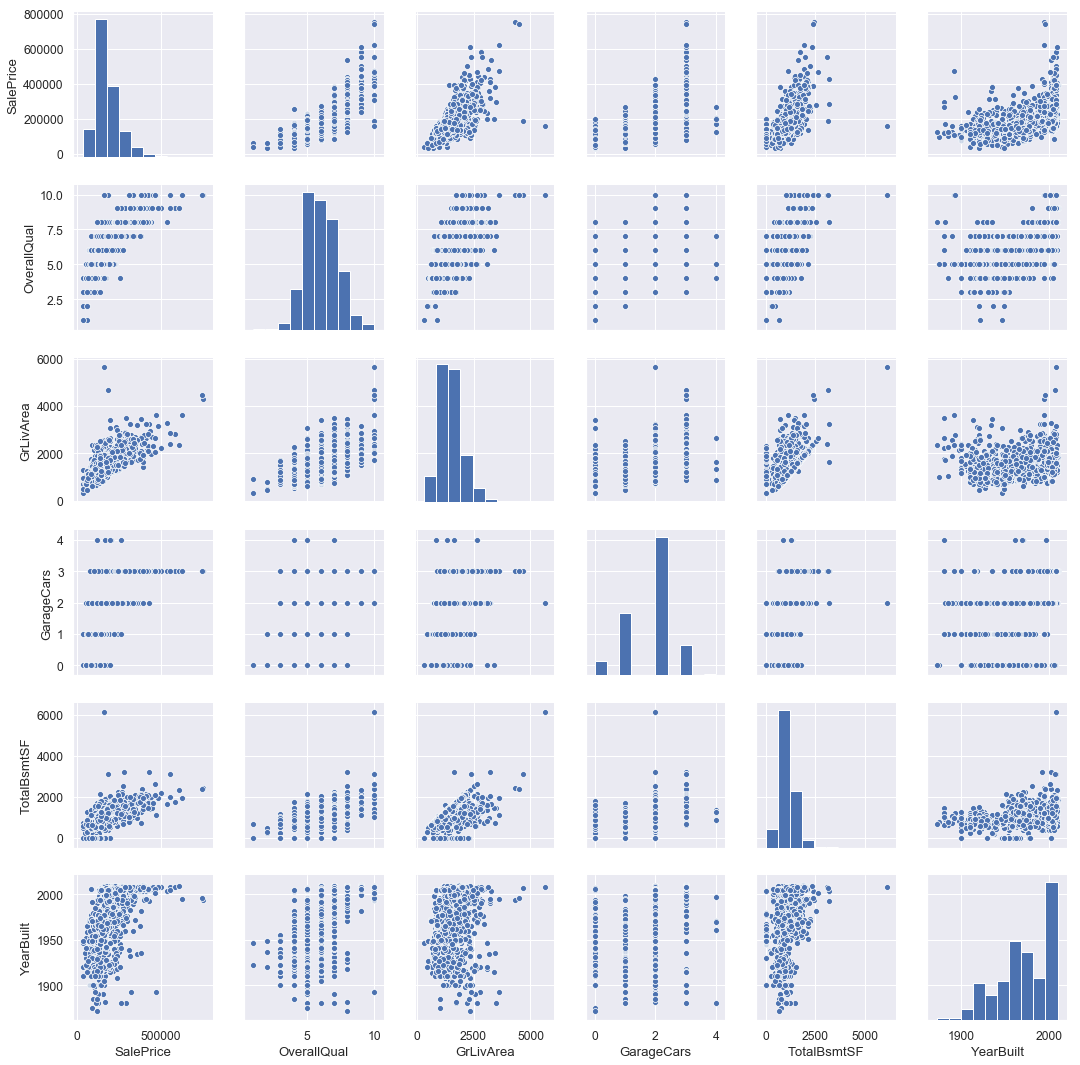

In [21]:
#seaborn可以一次性两两组合多个变量做出多个对比图，有n个变量，就会做出一个n × n个格子的图
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)  #要注意的是数据中不能有NaN（缺失的数据），否则会报错

From above scatter plot, we can see that:  
- **GrLivArea and TotalBsmtSF** are linearly related with SalePrice. The variables are positively related. When value of GrLivArea or TotalBsmtSF increases then SalePrice increases.

- **OverallQual and YearBuilt** are also positively related with SalePrice.

Let's draw a box plot of OverallQual with respect to SalePrice.  
(画OverallQual与SalePrice的箱型图）

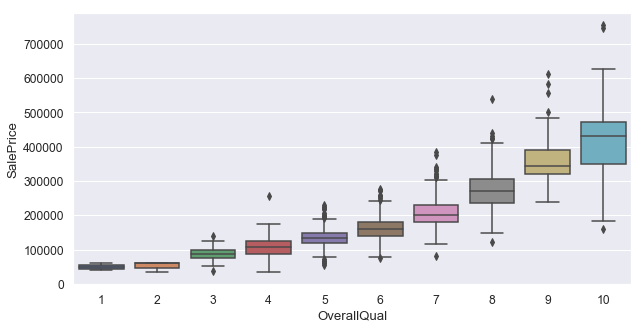

In [22]:
#box plot OverallQual/SalePrice
plt.figure(figsize=(10,5))
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

## Analyzing Response / Dependent Variable (SalePrice) distribution  
分析响应/因变量(SalePrice)的分布。

Let's analyze the distribution of SalePrice across our train dataset.

Here, we do **UNIVARIATE ANALYSIS（单变量分析）**. It's a kind of data observation and analysis which involves only one variable at a time.

We analyze **Skewness（偏度）** and **Kurtosis（峰度）** of SalePrice.

**Skewness（偏度）** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.   
偏度是度量对称性的，或者更确切地说，度量对称性的缺乏。如果一个分布或数据集在中心点的左边和右边看起来相同，那么该分布或数据集是对称的。

- **negative skew**: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data.  
负偏斜: 左尾较长;分布的质量集中在图的右边。尽管曲线本身似乎是向右倾斜或向右倾斜的，但这种分布被称为是左偏的、左偏的或向左倾斜的;左尾指的是被抽出的左尾，通常，平均值偏向数据的典型中心的左侧。

- **positive skew**: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data.  
正偏斜：右尾更长; 分布的质量集中在图的左侧。 尽管曲线本身看起来倾斜或向左倾斜，但据说这种分布是右倾斜的，右倾的或向右倾斜的; 右边是指正在绘制的右尾，通常，平均值偏向于典型数据中心的右侧。

**Kurtosis（峰度）** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.  
峰度是衡量相对于正态分布的数据是重尾还是轻尾的度量。 也就是说，具有高峰度的数据集往往具有较重的尾部或异常值。 具有低峰度的数据集往往具有轻尾或缺少异常值。

Graphical representation of data distribution for SalePrice:  
销售价格数据分布的图形表示：

- **Histogram(直方图)** - For viewing Skewness and Kurtosis(用于观察偏斜和峰度).  
- **Normal Probability Plot(正态概率图)** - For viewing how linearly the data is distribute. Data distribution should closely follow the diagonal(斜线） that represents the normal distribution.

In [23]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Number of Occurences')

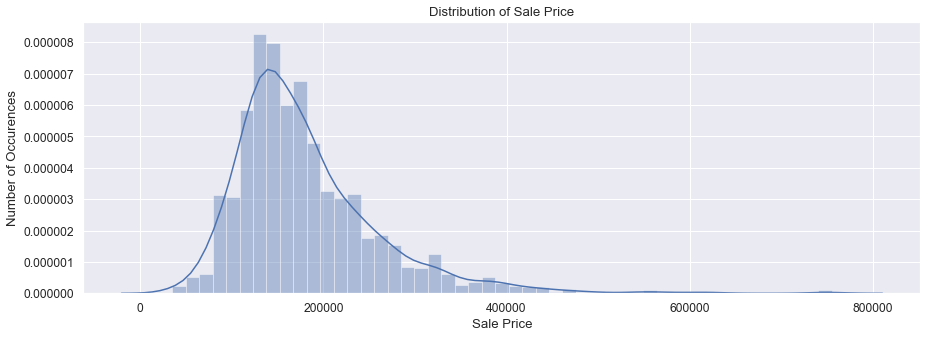

In [24]:
#histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

**补充偏度知识：**  
偏度的衡量是相对于正态分布来说，正态分布的偏度为0。因此我们说，若数据分布是对称的，偏度为0。  
若偏度>0,则可认为分布为右偏，即分布有一条长尾在右；  
若偏度 < 0，则可认为分布为左偏，即分布有一条长尾在左，同时偏度的绝对值越大，说明分布的偏移程度越严重。

![Image of Skewness（偏度）](http://img.mp.itc.cn/upload/20170205/b1450bc4a39645e3aab5c35df6420555_th.png)


**另外，偏度>0，分布右偏，长尾在右，高峰在左，这似乎与一般认知不太一致。但其实我们可以发现偏度实际上是三阶标准中心矩，而一个数据距离“中心”越远，对中心矩的计算影响越大。而当数据长尾在右，即有更多正偏的离群值，因此偏度>0;**  

**参考资料：**  
[1] [关于偏度与峰度的一些探索](http://www.sohu.com/a/125526669_609133)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

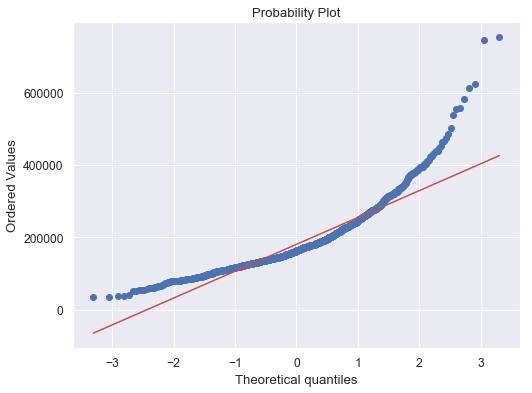

In [25]:
#normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'], plot=plt)

In [26]:
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


From the above computation and also from the above histogram, we can say that SalePrice:

- is positively skewed or right skewed  
- have high kurtosis

High Kurtosis(高峰度） means that SalePrice has some outliners(异常值). We need to remove them so that they don't affect our prediction result.

Text(0,0.5,'Number of Occurences')

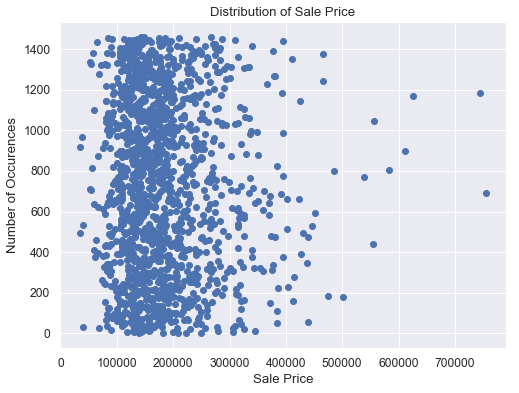

In [27]:
plt.figure(figsize=[8,6])
plt.scatter(train['SalePrice'].values,range(train.shape[0]))
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Number of Occurences')

Let's remove the extreme outliers as seen in the above figure.  
删除上图中的极端异常点

In [28]:
train.SalePrice.values.max() #极端异常点的最大值

755000

In [29]:
train['SalePrice'][np.argsort(train['SalePrice'],axis=0)[::-1]] #SalePrice的值降序排序
#或者train.SalePrice[np.argsort(train.SalePrice,axis=0)[::-1]] 

691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
473     440000
58      438780
349     437154
496     430000
389     426000
1142    424870
664     423000
278     415298
161     412500
1353    410000
231     403000
515     402861
661     402000
987     395192
774     395000
         ...  
155      79000
329      78000
250      76500
383      76000
614      75500
915      75000
264      73000
1321     72500
29       68500
1279     68400
398      67000
620      67000
874      66500
1432     64500
462      62383
375      61000
1100     60000
636      60000
410      60000
1380     58500
812      55993
1325     55000
705      55000
1337     52500
710      52000
30       40000
533      39300
968      37900
916      35311
495      34900
Name: SalePrice, Length: 1460, dtype: int64

In [30]:
# removing outliers
upperlimit = np.percentile(train.SalePrice.values,99.5) #在python中计算一个多维数组的任意百分比分位数，此处的百分位是从小到大排列，只需用np.percentile即可…
train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit  # slicing dataframe upto the uppperlimit（让SalePrice中大于upperlimit的值都取upperlimit?）
#train['SalePrice'][np.argsort(train['SalePrice'],axis=0)[::-1]] 
#或train.SalePrice[np.argsort(train.SalePrice,axis=0)[::-1]] 
#corr[np.argsort(corr,axis=0)[::-1]]

E:\Miniconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
train.SalePrice.values.max()

527331.9149999974

In [32]:
upperlimit

527331.9149999974

Text(0,0.5,'Number of Occurences')

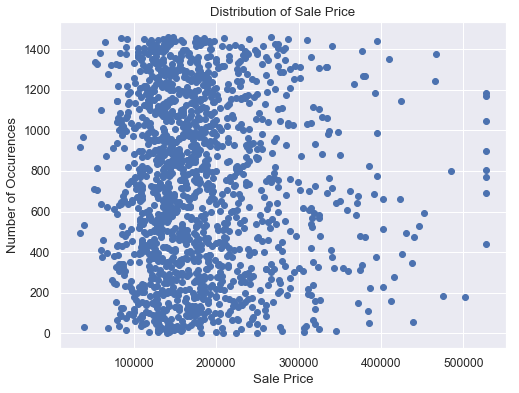

In [33]:
# plotting again the graph after removing outliers
plt.figure(figsize=[8,6])
plt.scatter(train["SalePrice"].values, range(train.shape[0]))
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Number of Occurences")

## Log Transformation (Log转换）

Another way of reducing skewness is by using **Log Transformation method** so that the data distribution become more linear. The logarithm function squeezes the larger values in your dataset and stretches out the smaller values.  
另一种减小偏度的方法是利用**对数转换方法**，以便数据分布变得更加线性。对数函数会压缩数据集中较大的值，并拉伸较小的值。

Original value = $x$

New value after log-transformation = $log_{10}(x)$ = $x'$

$x = 1$ then $log_{10}(1) = 0 $

$x = 10$ then $log_{10}(10) = 1$

$x = 100$ then $log_{10}(100) = 2$

Let's **log transform** our target variable **SalePrice** values:

In [34]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

After applying log transformation, let's see the **histogram** and **normal probability** plot to see how has this affected Skewness and Kurtosis of the data. And, how normal and linear does the data distribution becomes.  
在应用对数变换之后，让我们看一下直方图和正态概率图，看看它如何影响数据的偏度和峰度。 以及数据分布如何变得正态和线性。

E:\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.17558545,
         13.17558545, 13.17558545])),
 (0.3956831776652712, 12.023196041130895, 0.9957775371441351))

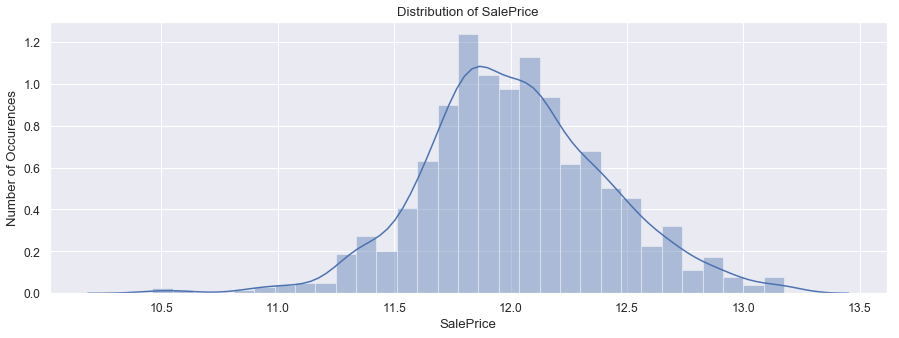

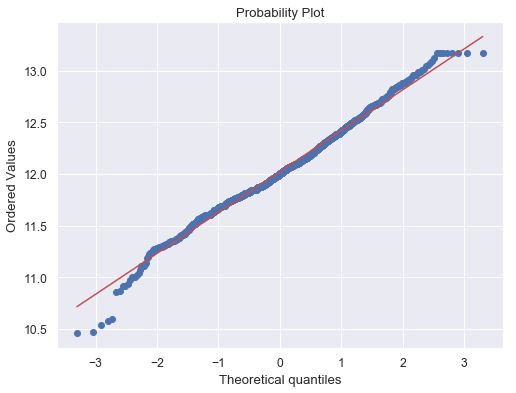

In [35]:
#histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['SalePrice'])
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Number of Occurences')

#normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['SalePrice'],plot=plt)

Great! We can see that log transformation has worked well and data distribution of SalePrice has been changed from right skewed to normal.  (SalePrice的数据分布已由右偏斜改为正态分布)

In [36]:
#skewness and kurtosis
print('Skewness: %f' %train['SalePrice'].skew())
print('Kurtosis: %f' %train['SalePrice'].kurt())

Skewness: 0.062732
Kurtosis: 0.622026


### Analyzing Predictors / Independent Variables Distribution

Let's analyze the distribution of predictors or independent variables.

Here, we do **MULTIVARIATE ANALYSIS(多变量分析)**. It's a kind of data observation and analysis which involves two or more variables at a time.

### PoolArea(游泳池面积), PoolQC(游泳池质量) vs SalePrice

Let's analysis Pool Area,Pool Quality and SalePrice's relationship.

**Note**: Saleprice is not displayed in thousand value because it is log-transformed above.  
由于经上面的Log转换，销售价格不会以千价显示了

In [37]:
train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [38]:
train['PoolQC'].isnull().value_counts()  #1453个缺失值，只有7个没有缺失

True     1453
False       7
Name: PoolQC, dtype: int64

E:\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(35.1061,0.5,'SalePrice')

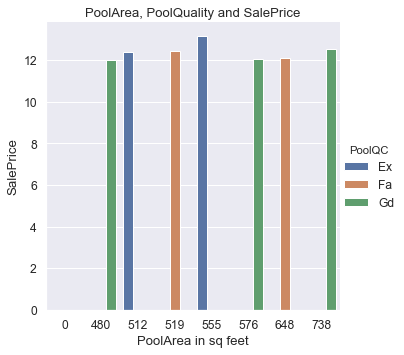

In [39]:
sns.factorplot(x="PoolArea", y="SalePrice",data=train,hue="PoolQC",kind='bar')
plt.title("PoolArea, PoolQuality and SalePrice")
plt.xlabel('PoolArea in sq feet')
plt.ylabel("SalePrice")

### Fireplaces, FireplaceQu vs SalePrice

Let's analyze number of Fireplaces, Fireplace Quality and Sale Price's relationship.

**Note**: Sale price is not displayed in thousand value because it is log-transformed above.

Figure below shows that having 2 fireplaces increases sale price of the house. Excellent quality of Fireplace increases the sale price significantly.

E:\Miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


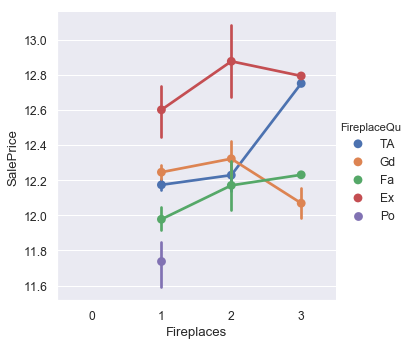

In [40]:
sns.factorplot("Fireplaces","SalePrice",data=train,hue="FireplaceQu")

In [41]:
pd.crosstab(train.Fireplaces, train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


### GrLivArea vs SalePrice

Let's analyze **GrLivArea** variable with respect to our target/response variable **SalePrice**.

Text(0,0.5,'SalePrice')

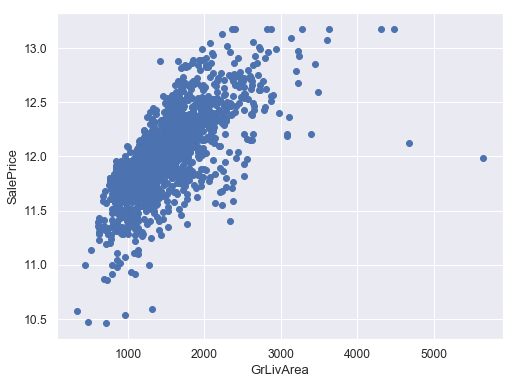

In [42]:
# scatter plot GrlivArea/SalePrice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

Note at the bottom right of the above plot. This shows that two very large GrLivArea are having low SalePrice. These values are **outliers for GrLivArea**.

Let's remove these outliers.

In [43]:
# Deleting outliers
#np.log(300000)=12.611537753638338
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Text(0,0.5,'SalePrice')

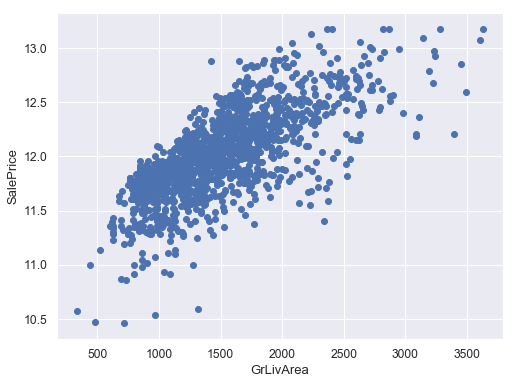

In [44]:
# Plot the graph again

# scatter plot grlivarea/saleprice
plt.figure(figsize=[8,6])
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

We have removed the extreme outliers from GrLivArea variable. Outliers can be present in other variables as well. But, removing outliers from all other variables may adversly affect our model because there can be outliers in test dataset as well. Solution to this will be to make the model more robust.  
我们已经从GrLivArea变量中去掉了极端异常值。异常值也可以出现在其他变量中。但是，从所有其他变量中删除异常值可能会对我们的模型产生不利影响，因为在测试数据集中也可能有异常值。解决这个问题的办法是使模型更加健壮。

### Getting Missing Values（获取缺失值）

Let's first concatenate train and test dataset into a single dataframe named **all_data**.

In [45]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

#all_data = pd.concat([train, test],ignore_index=True) 省略了sort=False表示不排序
#或all_data = pd.concat([train, test],sort=False,ignore_index=True)
all_data = pd.concat((train, test)).reset_index(drop=True)  #可以用sort=False
#all_data.shape  ——>(2915, 81)
all_data.drop(['SalePrice'], axis=1, inplace=True)  #inplace=True表示在all_data自身上执行删除操作，inplace=False返回一个副本
all_data.shape  #——>(2915, 80)

E:\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


(2915, 80)

List variables with missing data with total number of missing rows along with the missing percentage.  
列出缺失数据的变量以及缺失行的总数以及缺失百分比。

In [46]:
all_data.isnull().any()  #列是否缺失，False=0(无缺失)，True=1(缺失)

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
Alley             True
BedroomAbvGr     False
BldgType         False
BsmtCond          True
BsmtExposure      True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtFinType1      True
BsmtFinType2      True
BsmtFullBath      True
BsmtHalfBath      True
BsmtQual          True
BsmtUnfSF         True
CentralAir       False
Condition1       False
Condition2       False
Electrical        True
EnclosedPorch    False
ExterCond        False
ExterQual        False
Exterior1st       True
Exterior2nd       True
Fence             True
FireplaceQu       True
Fireplaces       False
Foundation       False
FullBath         False
                 ...  
LotFrontage       True
LotShape         False
LowQualFinSF     False
MSSubClass       False
MSZoning          True
MasVnrArea        True
MasVnrType        True
MiscFeature       True
MiscVal          False
MoSold           False
Neighborhood     False
OpenPorchSF      False
OverallCond

In [47]:
all_data.isnull().any().value_counts() #34列是缺失的，46列是不缺失的

False    46
True     34
dtype: int64

In [48]:
null_columns = all_data.columns[all_data.isnull().any()]  #得到的是缺失列
#len(null_columns)——>返回是34

# ① 得到每个缺失列的各缺失总数（即各特征的True值相加总数）
total_null_columns = all_data[null_columns].isnull().sum() 
#len(total_null_columns)——>返回是34

# ② 各缺失列的缺失比例 = 各缺失列的缺失总数/数据总数（总样本数）——>由上述可知有2915行样本
percent_null_columns = ( all_data[null_columns].isnull().sum() / all_data[null_columns].isnull().count() )

#把这两者按列拼接在一起，并各自重新命名，以Percent数值为标准降序排列
missing_data = pd.concat([total_null_columns, percent_null_columns], axis=1, keys=['Total', 'Percent']).sort_values(by=['Percent'], ascending=False)

#missing_data.head()
missing_data

,Total,Percent
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageCond,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


In [49]:
#all_data[null_columns].isnull()输得到的是各列数据的True和False情况
all_data[null_columns].isnull()

,Alley,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,KitchenQual,LotFrontage,MSZoning,MasVnrArea,MasVnrType,MiscFeature,PoolQC,SaleType,TotalBsmtSF,Utilities
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
7,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [50]:
all_data[null_columns].isnull().count() #获得各列（包括缺失和不缺失列）总行数

Alley           2915
BsmtCond        2915
BsmtExposure    2915
BsmtFinSF1      2915
BsmtFinSF2      2915
BsmtFinType1    2915
BsmtFinType2    2915
BsmtFullBath    2915
BsmtHalfBath    2915
BsmtQual        2915
BsmtUnfSF       2915
Electrical      2915
Exterior1st     2915
Exterior2nd     2915
Fence           2915
FireplaceQu     2915
Functional      2915
GarageArea      2915
GarageCars      2915
GarageCond      2915
GarageFinish    2915
GarageQual      2915
GarageType      2915
GarageYrBlt     2915
KitchenQual     2915
LotFrontage     2915
MSZoning        2915
MasVnrArea      2915
MasVnrType      2915
MiscFeature     2915
PoolQC          2915
SaleType        2915
TotalBsmtSF     2915
Utilities       2915
dtype: int64

Text(0.5,1,'Percent missing data by feature')

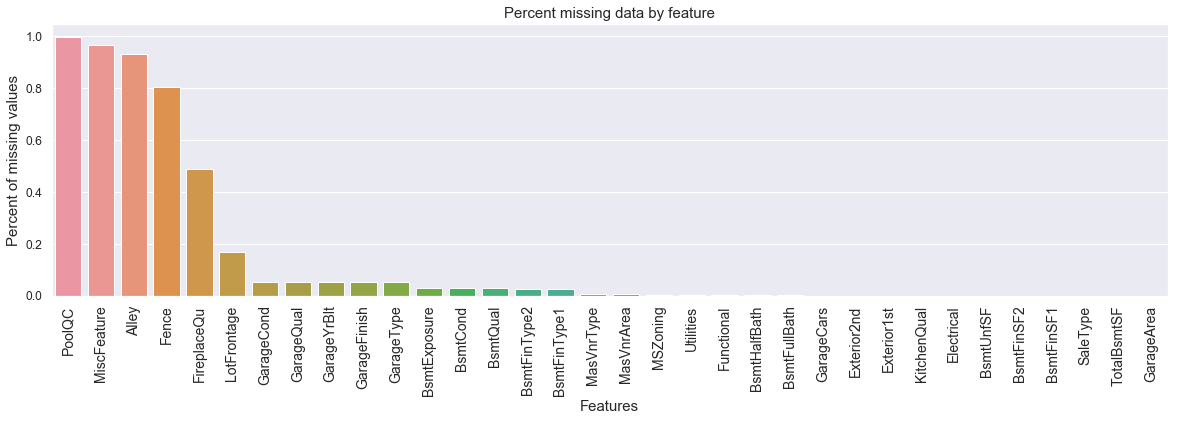

In [51]:
plt.figure(figsize=[20,5])
plt.xticks(rotation='90',fontsize=14)
sns.barplot(x=missing_data.index, y=missing_data.Percent)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Imputing Missing values

Imputation/Imputing = Replacing missing data with substituted values.

### PoolQC

+99% values are missing for **PoolQC**. this means majority of houses have "no Pool" in them. We replace NULL values  with "None".

In [52]:
#get unique values of the column data
all_data['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [53]:
#replace null values with 'None'
all_data['PoolQC'].fillna('None',inplace=True)

In [54]:
#get unique values of the column data
all_data['PoolQC'].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

### MiscFeature

+96% values are missing for **MiscFeature**. Null value or NA means "no MiscFeature" in the house.

In [55]:
# get unique values of the column data
all_data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [56]:
# replace null values with 'None'
all_data['MiscFeature'].fillna('None', inplace=True)

### Alley

+93% values are missing for **Alley**. Null value or NA means "no alley access" in the house.

In [57]:
# get unique values of the column data
all_data['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [58]:
# replace null values with 'None'
all_data['Alley'].fillna('None', inplace=True)

### Fence

+80% values are missing for Fence. Null value or NA means "no fence" in the house.

In [59]:
# get unique values of the column data
all_data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [60]:
# replace null values with 'None'
all_data['Fence'].fillna('None', inplace=True)

In [61]:
all_data['Fence'].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

### FireplaceQu

+48% values are missing for FireplaceQu. Null value or NA means "no fireplace" in the house.

In [62]:
# get unique values of the column data
all_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [63]:
# replace null values with 'None'
all_data['FireplaceQu'].fillna('None', inplace=True)

### LotFrontage

LotFrontage: Linear feet of street connected to property  

Neighborhood: Physical locations within Ames city limits

16.67% values are missing for LotFrontage. We can assume that the distance of the street connected to the property (LotFrontage) will be same as that of that particular property's neighbor property (Neighborhood).



We can fill the missing value by the **median LotFrontage** of all the Neighborhood.

In [64]:
 #有2429个样本是没有缺失（Pandas不支持Nan，不列入统计）
all_data['LotFrontage'].count()  # print('%.2f%%'%((1-2429/2915)*100)) = 16.67%
#或者all_data['LotFrontage'].isnull().value_counts()  输出:False 2429  True 486  

2429

E:\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

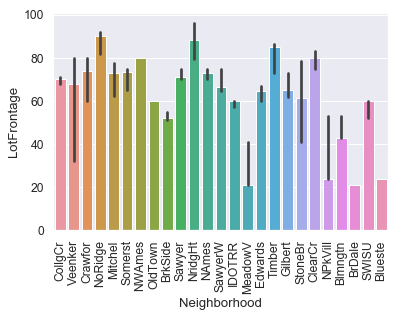

In [65]:
# barplot of median of LotFrontage with respect to Neighborhood
sns.barplot(data=train,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)  #将x的标签旋转90°

In [66]:
# get unique values of the column data
all_data['LotFrontage'].unique() #129个

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144.,
       114., 128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.,
        26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,  22.,
       123., 160., 195., 155., 126., 200., 131., 133.])

In [67]:
#观测
all_data.groupby('Neighborhood')['LotFrontage'].value_counts()

Neighborhood  LotFrontage
Blmngtn       43.0           12
              53.0            7
              51.0            1
Blueste       24.0            7
              35.0            3
BrDale        21.0           25
              24.0            5
BrkSide       50.0           33
              51.0           16
              60.0           15
              52.0           12
              55.0            6
              53.0            2
              56.0            1
              58.0            1
              59.0            1
              64.0            1
              65.0            1
              69.0            1
              70.0            1
              92.0            1
              98.0            1
              99.0            1
              144.0           1
ClearCr       80.0            4
              62.0            1
              65.0            1
              72.0            1
              73.0            1
              75.0            1
              

In [68]:
#观测
all_data.groupby('Neighborhood')['LotFrontage'].unique()

Neighborhood
Blmngtn                              [43.0, 53.0, nan, 51.0]
Blueste                                         [24.0, 35.0]
BrDale                                          [21.0, 24.0]
BrkSide    [50.0, 51.0, 60.0, 52.0, nan, 92.0, 55.0, 65.0...
ClearCr    [81.0, nan, 97.0, 73.0, 83.0, 92.0, 80.0, 62.0...
CollgCr    [65.0, 68.0, 91.0, 75.0, 85.0, 112.0, nan, 89....
Crawfor    [60.0, 80.0, nan, 61.0, 54.0, 70.0, 44.0, 90.0...
Edwards    [65.0, 73.0, 85.0, 75.0, 74.0, 24.0, 60.0, 62....
Gilbert    [nan, 74.0, 122.0, 134.0, 62.0, 99.0, 66.0, 70...
IDOTRR     [57.0, 50.0, 110.0, 60.0, 105.0, nan, 85.0, 71...
MeadowV            [44.0, 21.0, 36.0, nan, 42.0, 41.0, 31.0]
Mitchel    [85.0, 48.0, 69.0, 32.0, 82.0, nan, 75.0, 76.0...
NAmes      [nan, 70.0, 60.0, 47.0, 74.0, 68.0, 84.0, 100....
NPkVill                                    [nan, 24.0, 53.0]
NWAmes     [nan, 105.0, 48.0, 80.0, 85.0, 78.0, 90.0, 94....
NoRidge    [84.0, 121.0, 82.0, 174.0, 92.0, 90.0, 78.0, 9...
NridgHt    

In [69]:
#replace null values with median LotFrontage of all the Neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [70]:
#观测
all_data.groupby('Neighborhood')['LotFrontage'].value_counts()  #例如以中位数43填充nan值，可以看到此时有20个了，填充了7个

Neighborhood  LotFrontage
Blmngtn       43.0           20
              53.0            7
              51.0            1
Blueste       24.0            7
              35.0            3
BrDale        21.0           25
              24.0            5
BrkSide       50.0           33
              51.0           29
              60.0           15
              52.0           12
              55.0            6
              53.0            2
              56.0            1
              58.0            1
              59.0            1
              64.0            1
              65.0            1
              69.0            1
              70.0            1
              92.0            1
              98.0            1
              99.0            1
              144.0           1
ClearCr       80.5           24
              80.0            4
              62.0            1
              65.0            1
              72.0            1
              73.0            1
              

In [71]:
#观测
all_data.groupby('Neighborhood')['LotFrontage'].unique()

Neighborhood
Blmngtn                                   [43.0, 53.0, 51.0]
Blueste                                         [24.0, 35.0]
BrDale                                          [21.0, 24.0]
BrkSide    [50.0, 51.0, 60.0, 52.0, 92.0, 55.0, 65.0, 70....
ClearCr    [81.0, 80.5, 97.0, 73.0, 83.0, 92.0, 80.0, 62....
CollgCr    [65.0, 68.0, 91.0, 75.0, 85.0, 112.0, 70.0, 89...
Crawfor    [60.0, 80.0, 70.0, 61.0, 54.0, 44.0, 90.0, 63....
Edwards    [65.0, 73.0, 85.0, 75.0, 74.0, 24.0, 60.0, 62....
Gilbert    [64.0, 74.0, 122.0, 134.0, 62.0, 99.0, 66.0, 7...
IDOTRR     [57.0, 50.0, 110.0, 60.0, 105.0, 85.0, 71.0, 7...
MeadowV                 [44.0, 21.0, 36.0, 42.0, 41.0, 31.0]
Mitchel    [85.0, 48.0, 69.0, 32.0, 82.0, 74.0, 75.0, 76....
NAmes      [73.0, 70.0, 60.0, 47.0, 74.0, 68.0, 84.0, 100...
NPkVill                                         [24.0, 53.0]
NWAmes     [80.0, 105.0, 48.0, 85.0, 78.0, 90.0, 94.0, 91...
NoRidge    [84.0, 121.0, 82.0, 174.0, 92.0, 90.0, 78.0, 9...
NridgHt    

In [72]:
all_data['LotFrontage'].unique()

array([ 65. ,  80. ,  68. ,  60. ,  84. ,  85. ,  75. ,  51. ,  50. ,
        70. ,  72. ,  91. ,  73. ,  66. , 101. ,  57. ,  44. , 110. ,
        98. ,  47. , 108. , 112. ,  74. , 115. ,  67. ,  61. ,  48. ,
        33. ,  64. ,  52. , 100. ,  24. ,  89. ,  63. ,  76. ,  81. ,
        95. ,  69. ,  21. ,  32. ,  78. , 121. , 122. ,  40. , 105. ,
        77. ,  94. ,  34. ,  90. ,  80.5,  55. ,  88. ,  82. ,  71. ,
       120. , 107. ,  92. , 134. ,  62. ,  86. , 141. ,  97. ,  72.5,
        54. ,  41. ,  79. , 174. ,  99. ,  83. ,  43. , 103. ,  93. ,
        30. ,  64.5, 129. , 140. ,  35. ,  37. , 118. ,  87. , 116. ,
       150. , 111. ,  49. ,  96. ,  59. ,  36. ,  56. , 102. ,  58. ,
        38. , 109. , 130. ,  53. , 137. ,  88.5,  45. , 106. ,  42. ,
        39. , 104. , 144. , 114. , 128. , 149. , 313. , 168. , 182. ,
       138. , 152. , 124. , 153. ,  46. ,  26. ,  25. , 119. ,  31. ,
        28. , 117. , 113. , 125. , 135. , 136. ,  22. , 123. , 160. ,
       195. , 155. ,

### GarageType(车库类型), GarageFinish(车库装修), GarageQual and GarageCond

These are **categorical (nominal标称) variables** related to Garage(这些是与车库相关的分类（名义）变量). We replace their missing values with **"None"**. None means no Garage in the house.

In [73]:
# get unique values of the column data
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    print (all_data[col].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [74]:
# replace null values with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col].fillna('None', inplace=True)

### GarageYrBlt, GarageArea and GarageCars

These are **ordinal/numeric variables** related to Garage. We replace their missing values with **"0" (zero)**. Zero means no Garage in the house, so no Cars in Garage.

In [75]:
#get unique values of the column data
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    print('col=',col,'\n', all_data[col].unique())

col= GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896. 1895. 2207. 1943. 1919.]
col= GarageArea 
 [ 548.  460.  608.  642.  836.  480.  636.  484.  468.  205.  384.  736.
  352.  840.  576.  516.  294.  853.  280.  534.  572.  270.  890.  772.
  319.  240.  250.  271.  447.  556.  691.  672.  498.  246.    0.  440.
  308.  504.  300.  670.  826.  386.  388.  528.  894.  565.  641.  288.
  645.  852.  558.  220.  667.  360. 

In [76]:
#replace null values with 0
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col].fillna(0,inplace=True)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

These are **categorical (nominal) variables** related to Basement. We replace their missing values with **"None"**. None means no Basement in the house.

In [77]:
# get unique values of the column data
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    print (all_data[col].unique())

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [78]:
# replace null values with 'None'
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None', inplace=True)

In [79]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    print (all_data[col].unique())

['Gd' 'TA' 'Ex' 'None' 'Fa']
['TA' 'Gd' 'None' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'None']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']


### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath

These are **ordinal/numeric variables** related to Basement. We replace their missing values with** "0" (zero)**. Zero means no Basement in the house.

In [80]:
# replace null values with 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0, inplace=True)

### MasVnrArea, MasVnrType

NA for MasVnrArea and MasVnrType means there is "no masonry veneer" for the house. We replace the NA value of **nominal/categorical** feature **MasVnrType** with **"None"** and the NA value of ordinal feature **MasVnrArea** with **0 (zero)**.

In [81]:
all_data["MasVnrType"].fillna("None", inplace=True)
all_data["MasVnrArea"].fillna(0, inplace=True)

### MSZoning, Utilities, Functional, Exterior2nd, Exterior1st, KitchenQual, Electrical, SaleType

All of these features are **nominal/categorical**. Each of them has less than 5 missing values. We replace the missing values of each feature by the **most common value** for that particular feature.

In [82]:
all_data['MSZoning'].value_counts()  #'MSZoning'中出现频数最多的是Rl(其索引为0)

RL         2261
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [83]:
print(all_data['MSZoning'].mode()[0])

RL


In [84]:
"""
>>> df = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3]})
>>> df.mode()
   A
0  1
1  2
mode应该是众数，就是频数最高的那个。示例里面1和2都出现了3次，是最频繁的，所以返回的是这两个数字。
"""
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    print("col = ",col,'====\n',all_data[col].mode())
#'MSZoning'列中出现频数最多的那个是RL,'Utilities'列中出现频数最多的那个是AllPub  ...

col =  MSZoning ====
 0    RL
dtype: object
col =  Utilities ====
 0    AllPub
dtype: object
col =  Functional ====
 0    Typ
dtype: object
col =  Exterior2nd ====
 0    VinylSd
dtype: object
col =  Exterior1st ====
 0    VinylSd
dtype: object
col =  KitchenQual ====
 0    TA
dtype: object
col =  Electrical ====
 0    SBrkr
dtype: object
col =  SaleType ====
 0    WD
dtype: object


In [85]:
for col in ('MSZoning', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'):
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

### Recheck Columns for Missing Values(重新检查缺失值的列）

Now, there are no columns with missing values.

In [86]:
null_columns = all_data.columns[all_data.isnull().any()]
print (null_columns)

Index([], dtype='object')


In [87]:
#或者用该方法检查是否有缺失值
all_data.isnull().any().value_counts() #8列都没有缺失值

False    80
dtype: int64

### Reducing Skewness（偏度） of Predictors (Independent Variables)

Earlier in this notebook, we have reduced the Skewness of our target variable SalePrice. We did it through **Log Transformation**. We will apply the same for **all other numeric dependent variables(所有其他数值因变量)** having high skewness.

Let's check the Skewness of **numeric dependent variables(数值因变量)**:

In [88]:
all_data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


In [89]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
#print(numeric_features)

skewness = []
for col in numeric_features:
    skewness.append((col, all_data[col].skew()))
    #print(skewness) #[('1stFlrSF', 1.2536566053821), ('2ndFlrSF', 0.8436710593782841),...]
#重新命名两列，并且排序以Skewness为标准降序排列
pd.DataFrame(skewness, columns = ('Feature', 'Skewness')).sort_values(by='Skewness',ascending=False)

,Feature,Skewness
24,MiscVal,21.943440
29,PoolArea,18.711459
19,LotArea,13.130516
21,LowQualFinSF,12.086535
2,3SsnPorch,11.373947
18,KitchenAbvGr,4.301059
5,BsmtFinSF2,4.144996
9,EnclosedPorch,4.002856
30,ScreenPorch,3.945539
7,BsmtHalfBath,3.944922


### Unskewing Data(无偏斜数据)

We will use **Log Transformation** to reduce the Skewness of the positively skewed features.

In [90]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


### 补充知识：创建屏蔽数组

```
from __future__ import print_function 
import numpy as np from scipy.misc 
import lena 
import matplotlib.pyplot as plt

# 加载 Lena 图像
lena = lena() 

# 掩码数组和图像形状一致，元素取 0 和 1 的随机数
random_mask = np.random.randint(0, 2, size=lena.shape)

# 绘制原始图像
plt.subplot(221) 
plt.title("Original") 
plt.imshow(lena) 
plt.axis('off')

# ma.array 创建屏蔽数组
# 如果 random_mask 中某个元素是 0
# masked_array 中就将其屏蔽
# 访问会返回 masked
# 但是转换回 np.array 时会恢复
masked_array = np.ma.array(lena, mask=random_mask)
print(masked_array) 

# 绘制掩码后的图像
plt.subplot(222) 
plt.title("Masked") 
plt.imshow(masked_array) 
plt.axis('off')
```

In [91]:
positively_skewed_features = all_data[numeric_features].columns[abs(all_data[numeric_features].skew())>1]
#print(positively_skewed_features)

#applying Log transformation
for col in positively_skewed_features:
    #ma.array 表示创建屏蔽数组；屏蔽(all_data[col]<=0)的元素
    # using masked array to ignore log transformation of 0 values as (log 0) is undefined
    all_data[col] = np.log(np.ma.array(all_data[col],mask = (all_data[col]<=0)))

E:\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [92]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.752270,854,1.0,None,3,1Fam,TA,No,706.0,1.0,...,WD,1.0,Pave,8,856.0,AllPub,1.000000,2003,2003,2008
1,7.140453,0,1.0,None,3,1Fam,TA,Gd,978.0,1.0,...,WD,1.0,Pave,6,1262.0,AllPub,5.697093,1976,1976,2007
2,6.824374,866,1.0,None,3,1Fam,TA,Mn,486.0,1.0,...,WD,1.0,Pave,6,920.0,AllPub,1.000000,2001,2002,2008
3,6.867974,756,1.0,None,3,1Fam,Gd,No,216.0,1.0,...,WD,1.0,Pave,7,756.0,AllPub,1.000000,1915,1970,2006
4,7.043160,1053,1.0,None,4,1Fam,TA,Av,655.0,1.0,...,WD,1.0,Pave,9,1145.0,AllPub,5.257495,2000,2000,2008


In [93]:
%%HTML
<style>
  table {margin-left: 0 !important;}
</style>

### Creating Dummy Categorical Features

**Dummy variables(哑变量)** are used to convert **categorical/nominal(标称) features** into **quantitative one(定量特征)**. A new column is created for each unique category(类别) of a nominal/categorical column. Values in that newly created column will be either **1 or 0**.

Let's take an example of a column named **"Sex"** which has two values "male" and "female". If we create dummy variables for this column then two **new columns** will be added with name **"male" and "female"**. For any row, if the "Sex" value is 'male' then the "male" column will have value 1 and "female" column will have value 0. Similary, if the "Sex" value is 'female' then the "male" column will have value 0 and "female" column will have value 1.

#### BEFORE


|Row	| Sex|
|- -    | - -  |
|1	    |male | 
|2	    |female | 
|3	    |female  |
|4	    |male  |

#### AFTER CREATING DUMMY VARIABLES

|Row|	Sex|	male|	female|
|--  | -- |  --   | --|
|1|	male|	1|	0|
|2|	female|	0|	1|
|3|	female|	0|	1|
|4|	male|	1|	0|

We will now create dummy variables for all our categorical/nominal features.

In [94]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 302)


In [95]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,1.0,3,706.0,1.0,1.0,1.0,150.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.140453,0,1.0,3,978.0,1.0,0.0,0.0,284.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.824374,866,1.0,3,486.0,1.0,1.0,1.0,434.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.867974,756,1.0,3,216.0,1.0,1.0,1.0,540.0,5.605802,...,0,0,0,0,0,1,0,1,1,0
4,7.043160,1053,1.0,4,655.0,1.0,1.0,1.0,490.0,1.000000,...,0,0,0,0,0,1,0,1,1,0


## Getting new Train and Test dataset

**We are done with Feature Engineering part**. We will not split **all_data** into train and test dataset.

In [96]:
train = all_data[:ntrain]  #ntrain = 1456
test = all_data[ntrain:]

In [97]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.752270,854,1.0,3,706.0,1.0,1.0,1.0,150.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.140453,0,1.0,3,978.0,1.0,0.0,0.0,284.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.824374,866,1.0,3,486.0,1.0,1.0,1.0,434.0,1.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.867974,756,1.0,3,216.0,1.0,1.0,1.0,540.0,5.605802,...,0,0,0,0,0,1,0,1,1,0
4,7.043160,1053,1.0,4,655.0,1.0,1.0,1.0,490.0,1.000000,...,0,0,0,0,0,1,0,1,1,0


In [98]:
test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1456,6.797940,0,1.0,2,468.0,4.969813,0.0,1.0,270.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1457,7.192182,0,1.0,3,923.0,1.000000,0.0,1.0,406.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1458,6.833032,701,1.0,3,791.0,1.000000,0.0,1.0,137.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1459,6.830874,678,1.0,3,602.0,1.000000,0.0,1.0,324.0,1.0,...,0,0,0,0,0,1,0,1,1,0
1460,7.154615,0,1.0,2,263.0,1.000000,0.0,1.0,1017.0,1.0,...,0,0,0,0,0,1,0,1,1,0


### Modelling

Here, we create different regression models and evaluate the **Root Mean Square Error (RMSE)** of predictions done by those models. The root-mean-square error (RMSE) is a frequently used **measure** of the **differences** between values predicted by a model or an estimator and the values actually observed.

#### Note:
>Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better).

>Mean Square Error (MSE) ranges from 0 to 1. Generally, low error means better model. **But, in case of scikit-learn, high MSE means better model**. So, if our MSE value is 0.9 then we can say that our model is performing better as compared to MSE value 0.2.

>To revert this behavior of scikit-learn, we can use** "scoring" parameter** in "cross_val_scores" function like this:  
```py
cv_score = cross_val_score(lasso, train.drop(['Id'], axis=1), y_train, scoring="neg_mean_squared_error", cv=5)
```

We will be testing the **following Regression Models for this House Price problem**:

- Lasso
- Elastic Net
- Kernel Ridge
- Gradient Boost
- XGBoost
- LightGBM（没做）

Let's first import the model libraries.

In [99]:
#import model libraries
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

E:\Miniconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Kernel Ridge Regression即使用核技巧的岭回归（L2正则线性回归），它的学习形式和SVR（support vector regression）相同，但是两者的损失函数不同：KRR使用的L2正则均方误差；SVR使用的是带L2正则的ϵϵ-insensitive loss：max(0,|y−hθ(x)|−ϵ)max(0,|y−hθ(x)|−ϵ)。   
KRR有近似形式的解，并且在中度规模的数据时及其有效率，由于KRR没有参数稀疏化的性能，因此速度上要慢于SVR（它的损失函数有利于得到稀疏化的解）。   
KRR的最小二乘解：β=(K+λI)−1y，w=∑βiXiβ=(K+λI)−1y，w=∑βiXi，这里的KK是核函数。最小二乘解不适用于大规模数据。

### Defining train and test data to train model

In [100]:
X_train = train.drop(['Id'], axis = 1)
# y_train has been defined above where we combined train and test data to create all_data
X_test = test.drop(['Id'], axis =1)

### Lasso Regression

RobustScaler() method is added to the pipeline to make the model less sensitive to outliers

In [101]:
#lasso = Lasso(alpha =0.0005, random_state = 1)
#lasso = Lasso()
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005))
#y_train is defined above where we combined train and test data to create all_data
#np.sqrt() function is used to create square root of MSE returned by cross_val_score function 
cv_score = np.sqrt( - cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error",cv =5))
print(cv_score)
print("Score(mean: %f, std: %f)" %(np.mean(cv_score),np.std(cv_score)))

[0.10605609 0.11134129 0.11972374 0.10013615 0.10878121]
Score(mean: 0.109208, std: 0.006443)


In [102]:
-cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error",cv =5)

array([0.01124789, 0.01239688, 0.01433377, 0.01002725, 0.01183335])

In [103]:
cross_val_score(model_lasso, X_train, y_train, scoring="neg_mean_squared_error",cv =5)

array([-0.01124789, -0.01239688, -0.01433377, -0.01002725, -0.01183335])

### 需要注意的是如下语句，
使用**cross_val_score**返回出来的均方误差都是**负数值**，并且是没有开根号之前的误差。  
Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

mean_squared_error计算公式：  
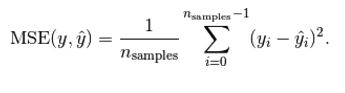
- cv=5,表示将训练数据分成5份，挨个交叉验证，再取平均值。
- scroring = “neg_mean_squared_error”是将预测的relevance的值和实际的relevance的值进行均方误差，即第二步中的MSE的公式。**但是用corss_val_score返回的score是负数值，需要加负号再开根号**。  
**参考资料：**  
[1] 自然语言处理入门学习<二>： https://zhuanlan.zhihu.com/p/24252852

### ElasticNet Regression

**RobustScaler()** method is added to the pipeline to make the model less sensitive to outliers.

In [107]:
model_elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005))
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
"""
>>> import numpy as np
>>> a = np.array([1,2,3,4])
>>> np.sqrt(a)
array([1.        , 1.41421356, 1.73205081, 2.        ])
>>> b = np.array([2,3,-4])
>>> np.sqrt(b)
__main__:1: RuntimeWarning: invalid value encountered in sqrt
array([1.41421356, 1.73205081,        nan])
"""
cv_score = np.sqrt( -cross_val_score(model_elastic_net, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print(cv_score)
print("Score (mean: %f, std: %f)" %(np.mean(cv_score),np.std(cv_score)))

[0.10609503 0.11304797 0.12187797 0.10023517 0.11022137]
Score (mean: 0.110296, std: 0.007219)


### Kernel Ridge Regression(核岭回归)

In [108]:
model_kernel_ridge = KernelRidge(alpha=0.6)
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_kernel_ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.11446845 0.12290099 0.12999277 0.10554084 0.11596479]
SCORE (mean: 0.117774 , std: 0.008239)


### Gradient Boosting Regression

**loss='huber'** is added as parameter to make the model less sensitive to outliers.

对于回归模型，有均方差"ls", 绝对损失"lad", Huber损失"huber"和分位数损失“quantile”。默认是均方差"ls"。一般来说，如果数据的噪音点不多，用默认的均方差"ls"比较好。如果是噪音点较多，则推荐用抗噪音的损失函数"huber"。而如果我们需要对训练集进行分段预测的时候，则采用“quantile”。

In [109]:
model_gboost = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,
                                        max_depth=4, max_features = 'sqrt',
                                        min_samples_leaf =15, min_samples_split=10,
                                        loss = 'huber',random_state=2018)
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_gboost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.10787342 0.1275789  0.12615559 0.10658516 0.1134412 ]
SCORE (mean: 0.116327 , std: 0.008921)


### XGBoost ( eXtreme Gradient Boosting )

XGBoost is an implementation of gradient boosted decision trees **designed for speed and performance**.

In [110]:
model_xgboost = xgb.XGBRegressor(colsample_bytree=0.4603,gamma = 0.0468, learning_rate=0.05,max_depth=3,min_child_weight=1.7817,n_estimators=2200,reg_alpha=0.4640,reg_lambda=0.8571,subsample=0.5213,silent=True,nthread=-1)
# y_train is defined above where we combined train and test data to create all_data
# np.sqrt() function is used to create square root of MSE returned by cross_val_score function
cv_score = np.sqrt( -cross_val_score(model_xgboost, X_train, y_train, scoring="neg_mean_squared_error", cv=5) )
print (cv_score)
print ("SCORE (mean: %f , std: %f)" % (np.mean(cv_score), np.std(cv_score)))

[0.11000416 0.12198316 0.12266225 0.10937407 0.11400169]
SCORE (mean: 0.115605 , std: 0.005714)


### Generate Predictions

### Training our regression model(训练我们的回归模型)

We have already done Cross Validation before **but Cross Validation fits the classifier on different subsets of dataset**, and then averages their scores. It is a common practice to train/fit classifier **on full dataset** after it has shown sufficient score in **Cross Validation**(交叉验证)。  
**如上面是5折交叉验证，我们最终需要在所有训练集（X_train和y_train）上进行fit，然后再去用测试集(X_test)做出预测得到y_test**.

Hence, here we train our models **with fit method**, i.e. we fit our models **with the predictors (X_train) and outcome (y_train)** so that it can learn and predict the outcome in future.

### 开始拟合

In [112]:
model_lasso.fit(X_train, y_train)
model_elastic_net.fit(X_train, y_train)
model_kernel_ridge.fit(X_train, y_train)
model_gboost.fit(X_train, y_train)
model_xgboost.fit(X_train, y_train)
#model_lgbm.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=0, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5213)

In [115]:
model_lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

## Generating Prediction on Training data

Above, we have trained our model with the **training dataset**. Here, use those trained models to generate predition on the training data itself. And then calculate the ***Root Mean Squre Error (RMSE)** of those predictions.

This can show how accurately the model predict the data that it has already seen before. The result below shows **that Gradient Boosting model** has the most accurate predictions for already learned data.

In [118]:
dict_models = {'lasso':model_lasso, 'elastic_net':model_elastic_net,'kernel_ridge':model_kernel_ridge,
              'gboost':model_gboost, 'xgboost':model_xgboost}

for key, value in dict_models.items():
    pred_train = value.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, pred_train))
    print("%s: %f" %(key,rmse))     

lasso: 0.098365
elastic_net: 0.094859
kernel_ridge: 0.089563
gboost: 0.051819
xgboost: 0.078901


In [125]:
"""
>>> dict = {'a':3,'b':54,'g':32,'C':34}
>>> for key, value in dict.items():
...     print("key=%s, value=%f" %(key,value))
...
key=a, value=3.000000
key=b, value=54.000000
key=g, value=32.000000
key=C, value=34.000000
"""
dict = {'a':3,'b':54,'g':32,'C':34}
for key, value in dict.items():
    print("key=%s, value=%f" %(key,value))


key=a, value=3.000000
key=b, value=54.000000
key=g, value=32.000000
key=C, value=34.000000


## Generate Predictions on Test dataset

We use **np.expm1()** function. This calculates $exp(x) - 1$ for all elements in the array. This is needed here because we have **log transformed** the SalePrice earlier to reduce the Skewness of SalePrice data distribution.

相当于:  
log(Y_predict) = y_test   
y_test = model.predict(X_test)  
Y_predict = exp(model.predict(X_test)) = exp(model.predict(y_test))  
只不过这里用的是 :  
```np.expm1()``` = ```exp(model.predict(X_test)) - 1 = exp(model.predict(y_test)) -1```

In [128]:
model_lasso.predict(X_test)

array([11.71062997, 11.95069743, 12.11854064, ..., 12.02179119,
       11.68181955, 12.32751783])

In [129]:
prediction_lasso =np.expm1(model_lasso.predict(X_test))

In [130]:
prediction_lasso

array([121859.22481642, 154924.15784165, 183236.90886589, ...,
       166339.33642579, 118398.47311146, 225824.49348805])

In [132]:
prediction_lasso = np.expm1(model_lasso.predict(X_test))
prediction_elastic_net = np.expm1(model_elastic_net.predict(X_test))
prediction_kernel_ridge = np.expm1(model_kernel_ridge.predict(X_test))
prediction_gboost = np.expm1(model_gboost.predict(X_test))

prediction_xgboost = np.expm1(model_xgboost.predict(X_test))
#prediction_lgbm = np.expm1(model_lgbm.predict(X_test))

## Different combinations of Predictions(不同的预测组合)

We can try different prediction combination before generating the Kaggle submission file. **We can try single prediction model or an average of two or more prediction model.**

I got **better result** on Kaggle score while **combining prediction Lasso and Elastic Net models and taking the average of their prediction**.

In [133]:
prediction = prediction_gboost
prediction

array([127284.2185893 , 162086.50191767, 192215.56966088, ...,
       154727.18409827, 117783.10321182, 210406.43530462])

In [138]:
#得分月底越好，误差损失越小，说明模型预测越好（准确）
# kaggle score: 0.12346
#prediction = prediction_gboost

# kaggle score: 0.12053
#prediction = (prediction_lasso + prediction_xgboost) / float(2) 

# kaggle score: 0.11960
#prediction = prediction_lasso 

# kaggle score: 0.11937
prediction = (prediction_lasso + prediction_elastic_net) / float(2) 

#print (prediction)

## Create Submission File to Kaggle(创建Kaggle提交文件)

In [139]:
submission = pd.DataFrame({
    "Id":test["Id"],
    "SalePrice":prediction
})
submission.to_csv('submission_csv',index = False)